In [1]:
import pypsa
import pandas as pd

In [2]:
import import_ipynb
# This line imports the MGA_functions notebook which contains 
# the MGA_solver function and other plotting functions
from MGA_functions import *

importing Jupyter notebook from MGA_functions.ipynb


## Defining Network

In [12]:
network = pypsa.Network()

# Create an empty network.
network.set_snapshots(range(2))

# Add a bus to the network.
network.add("Bus","bus")

# Add a coal power plant to the bus.
network.add("Generator","coal",bus="bus",
       committable=True,
       p_min_pu=0.2,
       marginal_cost=15,
       p_nom_extendable=False,
       p_nom=4000)

# Add a gas power plant to the bus.
network.add("Generator","gas",bus="bus",
       committable=True,
       marginal_cost=20,
       p_min_pu=0,
       p_nom_extendable=True,
       p_nom_max=1000)

# Add a 2nd gas power plant to the bus.
network.add("Generator","bio",bus="bus",
       committable=True,
       marginal_cost=18,
       p_min_pu=0,
       p_nom_extendable=True,
       p_nom_max=3000)

# Add load to the bus.
network.add("Load","load",bus="bus",p_set=[6000,1200])

#### Solving network with MGA solver 

In [13]:
network = MGA_solver(network,0.01)

INFO:pypsa.pf:Slack bus for sub-network 0 is bus
INFO:pypsa.opf:Performed preliminary steps
INFO:pypsa.opf:Building pyomo model using `angles` formulation
Index(['gas', 'bio'], dtype='object')
Currently PyPSA cannot do both these functions, so PyPSA is choosing investment optimisation for these generators.
INFO:pypsa.opf:Solving model using gurobi
INFO:pypsa.opf:Optimization successful


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: x13
  Lower bound: 114000.0
  Upper bound: 114000.0
  Number of objectives: 1
  Number of constraints: 17
  Number of variables: 13
  Number of binary variables: 2
  Number of integer variables: 2
  Number of continuous variables: 11
  Number of nonzeros: 29
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Return code: 0
  Message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Termination condition: optimal
  Termination message: Model was solved to optimality 

INFO:pypsa.pf:Slack bus for sub-network 0 is bus
INFO:pypsa.opf:Performed preliminary steps
INFO:pypsa.opf:Building pyomo model using `angles` formulation
Index(['gas', 'bio'], dtype='object')
Currently PyPSA cannot do both these functions, so PyPSA is choosing investment optimisation for these generators.
INFO:pypsa.opf:Solving model using gurobi
INFO:pypsa.opf:Optimization successful


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: x13
  Lower bound: 6630.0
  Upper bound: 6630.0
  Number of objectives: 1
  Number of constraints: 18
  Number of variables: 13
  Number of binary variables: 2
  Number of integer variables: 2
  Number of continuous variables: 11
  Number of nonzeros: 35
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Return code: 0
  Message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Termination condition: optimal
  Termination message: Model was solved to optimality (sub

INFO:pypsa.pf:Slack bus for sub-network 0 is bus
INFO:pypsa.opf:Performed preliminary steps
INFO:pypsa.opf:Building pyomo model using `angles` formulation
Index(['gas', 'bio'], dtype='object')
Currently PyPSA cannot do both these functions, so PyPSA is choosing investment optimisation for these generators.
INFO:pypsa.opf:Solving model using gurobi
INFO:pypsa.opf:Optimization successful


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: x13
  Lower bound: 6820.0
  Upper bound: 6820.0
  Number of objectives: 1
  Number of constraints: 18
  Number of variables: 13
  Number of binary variables: 2
  Number of integer variables: 2
  Number of continuous variables: 11
  Number of nonzeros: 35
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Return code: 0
  Message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Termination condition: optimal
  Termination message: Model was solved to optimality (sub

INFO:pypsa.pf:Slack bus for sub-network 0 is bus
INFO:pypsa.opf:Performed preliminary steps
INFO:pypsa.opf:Building pyomo model using `angles` formulation
Index(['gas', 'bio'], dtype='object')
Currently PyPSA cannot do both these functions, so PyPSA is choosing investment optimisation for these generators.
INFO:pypsa.opf:Solving model using gurobi
INFO:pypsa.opf:Optimization successful


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: x13
  Lower bound: 6630.0
  Upper bound: 6630.0
  Number of objectives: 1
  Number of constraints: 18
  Number of variables: 13
  Number of binary variables: 2
  Number of integer variables: 2
  Number of continuous variables: 11
  Number of nonzeros: 35
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Return code: 0
  Message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Termination condition: optimal
  Termination message: Model was solved to optimality (sub

#### Displaying solutions 

In [14]:
for i in range(len(network.solutions)):
    print('solution ',i+1)
    print(network.solutions[i].generators_t.p)

solution  1
     coal  gas     bio
0  4000.0  0.0  2000.0
1  1200.0  0.0     0.0
solution  2
     coal    gas     bio
0  4000.0  570.0  1430.0
1  1200.0    0.0     0.0
solution  3
     coal  gas     bio
0  4000.0  0.0  2000.0
1   820.0  0.0   380.0


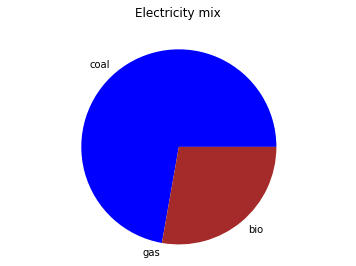

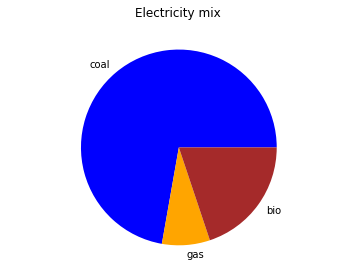

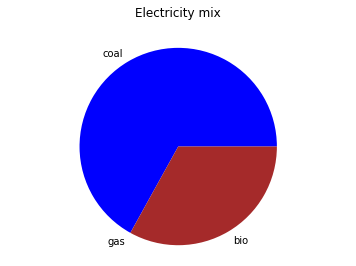

In [15]:
for solution in network.solutions:
    plot_generator_mix(solution) 